[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and ultralytics:

In [ ]:
!pip install -U torch sahi ultralytics

In [1]:
import os
#os.getcwd()

- Import required modules:

In [2]:
# arrange an instance segmentation model for test
from sahi.utils.ultralytics import (
    download_yolo11n_model, download_yolo11n_seg_model,
    # download_yolov8n_model, download_yolov8n_seg_model
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov8 model and two test images:

In [6]:
yolo11n_model_path = "models/yolo11n.pt"
# download_yolo11n_model(yolo11n_model_path)
# yolov8n_model_path = "models/yolov8n.pt"
# download_yolov8n_model(yolov8n_model_path)

# download test images into demo_data folder
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv8/YOLO11 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [7]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolo11', # or 'yolov8'
    model_path=yolo11n_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [8]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [9]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

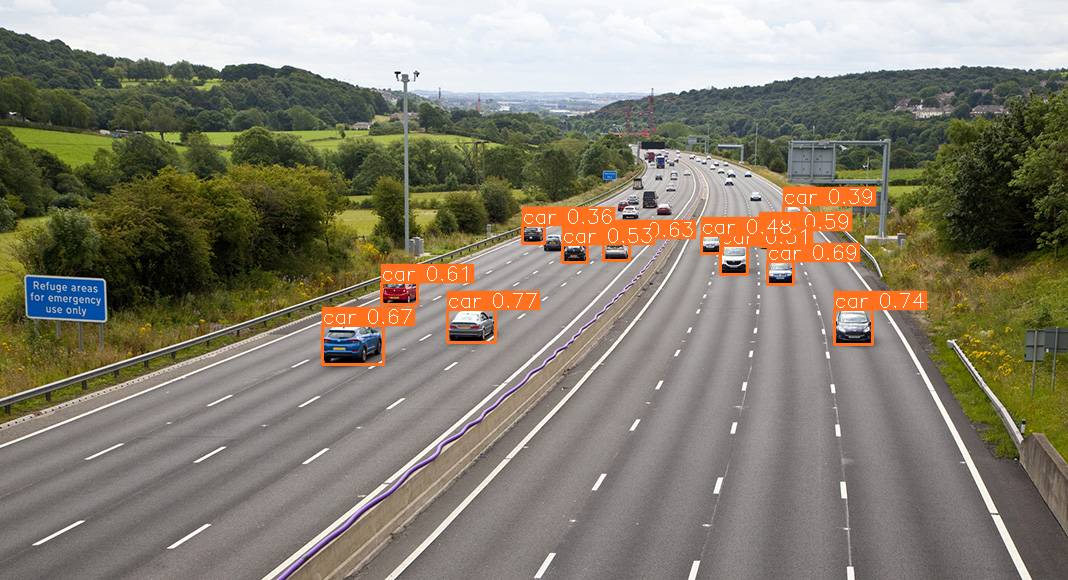

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8/YOLO11 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [11]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:

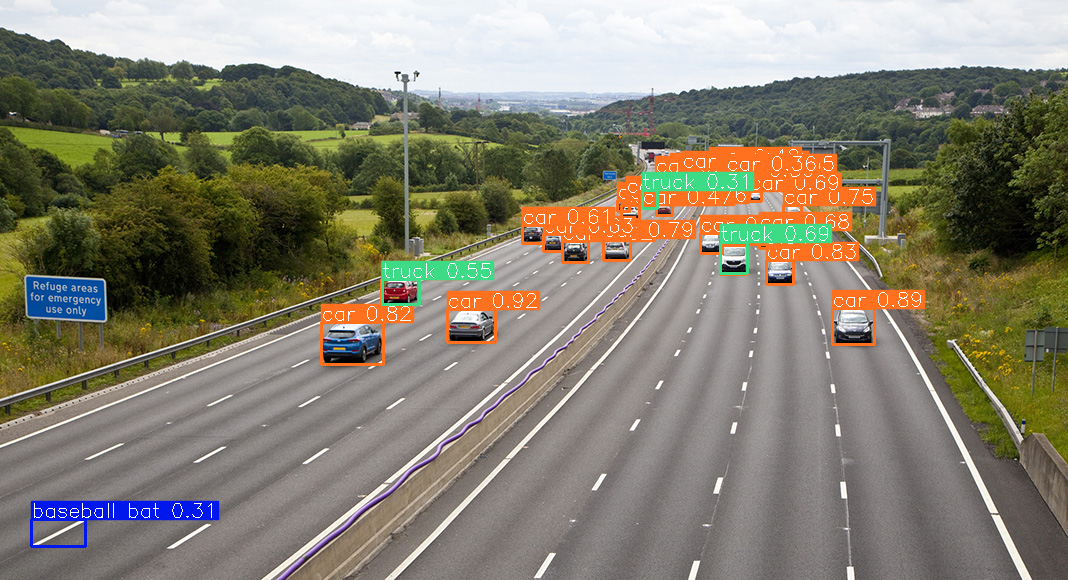

In [12]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [13]:
object_prediction_list = result.object_prediction_list

In [14]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.7865905761719, 309.0754089355469, 495.37784576416016, 342.2126770019531), w: 47.59125518798828, h: 33.13726806640625>,
    mask: None,
    score: PredictionScore: <value: 0.9220685362815857>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [15]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.7865905761719,
   309.0754089355469,
   47.59125518798828,
   33.13726806640625],
  'score': 0.9220685362815857,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': None,
  'bbox': [832.6653289794922,
   308.7012710571289,
   41.41851043701172,
   36.02068328857422],
  'score': 0.8925949335098267,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': None,
  'bbox': [766.1782531738281,
   260.6600875854492,
   27.710235595703125,
   23.558876037597656],
  'score': 0.8331305980682373,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [16]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.7865905761719,
   309.0754089355469,
   47.59125518798828,
   33.13726806640625],
  'score': 0.9220685362815857,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': 1,
  'bbox': [832.6653289794922,
   308.7012710571289,
   41.41851043701172,
   36.02068328857422],
  'score': 0.8925949335098267,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': 1,
  'bbox': [766.1782531738281,
   260.6600875854492,
   27.710235595703125,
   23.558876037597656],
  'score': 0.8331305980682373,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [17]:
result.to_imantics_annotations()[:3]

ImportError: Please run "pip install -U imantics" to install imantics first for imantics conversion.

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [18]:
result.to_fiftyone_detections()[:3]

ImportError: Please run "pip install -U fiftyone" to install fiftyone first for fiftyone conversion.

## 4. Batch Prediction

- Set model and directory parameters:

In [19]:
model_type = "yolo11"
model_path = yolo11n_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [20]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|███▎      | 1/3 [00:00<00:01,  1.03it/s]

Prediction time is: 874.08 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:01<00:00,  1.09it/s]

Prediction time is: 810.29 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

Prediction time is: 1029.07 ms
Prediction results are successfully exported to runs/predict/exp


# 0.6 Segmentation

Run above examples for segmentation model.

In [21]:
yolo11n_seg_model_path = "models/yolo11n-seg.pt"
# download_yolo11n_seg_model(yolo11n_seg_model_path)
# yolov8n_seg_model_path = "models/yolov8n-seg.pt"
# download_yolov8n_seg_model(yolov8n_seg_model_path)


In [22]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='yolo11', # or 'yolov8'
    model_path=yolo11n_seg_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

In [23]:
im = read_image("demo_data/small-vehicles1.jpeg")
h = im.shape[0]
w = im.shape[1]

result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model_seg, full_shape=(h, w))

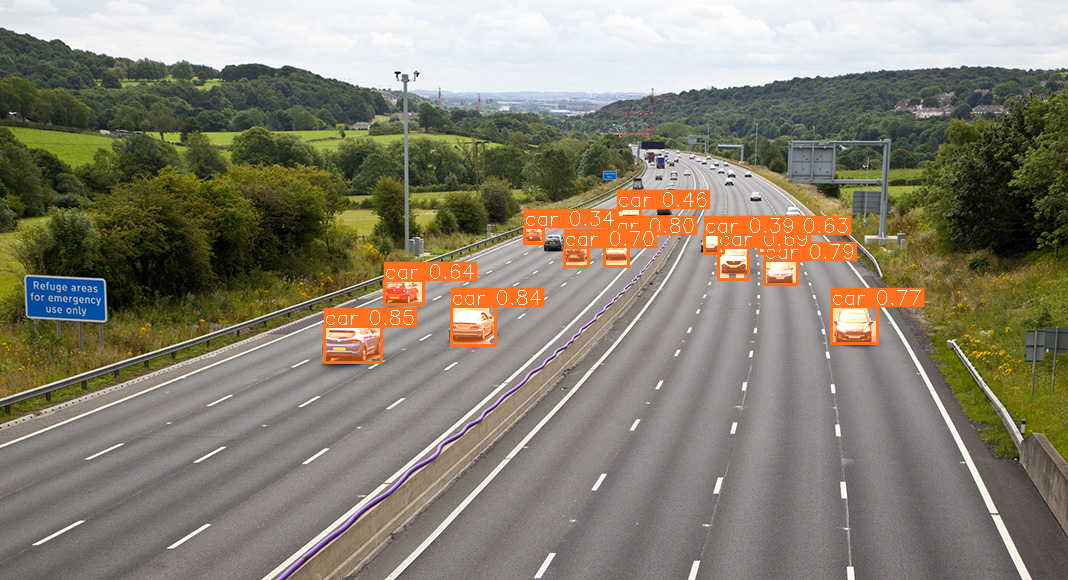

In [24]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [25]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


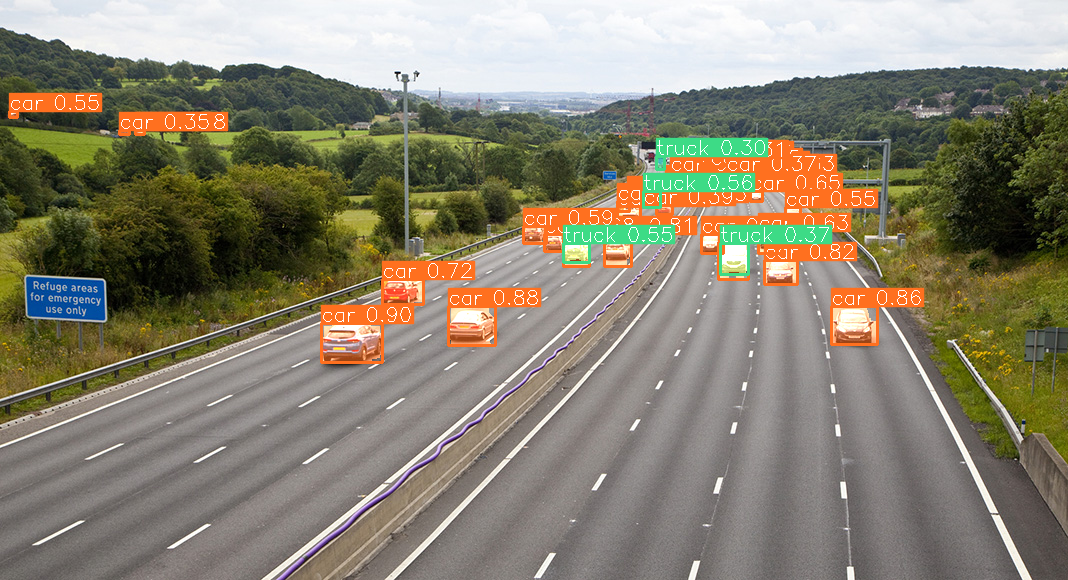

In [26]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [27]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321, 323, 382, 362), w: 61, h: 39>,
    mask: <sahi.annotation.Mask object at 0x7fcd38c34eb0>,
    score: PredictionScore: <value: 0.9011313319206238>,
    category: Category: <id: 2, name: car>>

In [33]:
# object_prediction_list[0].mask.segmentation
type(object_prediction_list[0].mask)
# type(object_prediction_list[0])

sahi.annotation.Mask

Sliced predictions are much better

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████▎                          | 1/3 [00:01<00:03,  1.74s/it]

Prediction time is: 1615.49 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|██████████████████████████▋             | 2/3 [00:03<00:01,  1.70s/it]

Prediction time is: 1593.49 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|████████████████████████████████████████| 3/3 [00:05<00:00,  1.86s/it]

Prediction time is: 2070.87 ms
Prediction results are successfully exported to runs/predict/exp9
